In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [4]:
microdados=pd.read_csv("../dados/relatorio_chamada_regular_SISU_2011_1.csv", sep="|", encoding="utf-8")

In [5]:
colunasSelecionadas=['nu_ano', 'co_inscricao_enem','ds_etapa','cod_ies', 'ies','uf_ies', 'campus','uf_campus', 'municipio_campus', 'nome_curso','grau','turno','tp_modalidade',
                      'tp_sexo', 'uf_origem','municipio_candidato','st_opcao','nota_concorrencia','nu_notacorte',
                      'st_aprovado','st_matricula', 'nu_peso_l', 'nu_peso_ch',
                    'nu_peso_cn', 'nu_peso_m', 'nu_peso_r', 'nota_minima_l',
                    'nota_minima_ch', 'nota_minima_cn', 'nota_minima_m', 'dt_nascimento',
                    'nota_minima_r', 'media_minima']
microdados= pd.read_csv("../dados/relatorio_chamada_regular_SISU_2011_1.csv", sep="|", encoding="utf-8" ,  usecols= colunasSelecionadas , decimal=',')

In [6]:
microdados

,nu_ano,ds_etapa,cod_ies,ies,uf_ies,campus,uf_campus,municipio_campus,nome_curso,grau,...,co_inscricao_enem,tp_sexo,dt_nascimento,uf_origem,municipio_candidato,st_opcao,nota_concorrencia,nu_notacorte,st_aprovado,st_matricula
0,2011,1ª CHAMADA,17,UNIVERSIDADE FEDERAL DE UBERLÂNDIA,MG,CAMPUS DO PONTAL - ITUIUTABA,MG,Ituiutaba,FÍSICA,Licenciatura,...,201XXXXXX002,F,1992,35,SUZANO,1,678.80,647.86,S,N
1,2011,1ª CHAMADA,4358,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO...",MG,CAMPUS INCONFIDENTES,MG,Inconfidentes,CIÊNCIAS BIOLÓGICAS,Licenciatura,...,201XXXXXX002,F,1992,35,SUZANO,2,667.35,641.42,N,N
2,2011,1ª CHAMADA,583,UNIVERSIDADE FEDERAL DO CEARÁ,CE,CAMPUS - SOBRAL - DERBY,CE,Sobral,MEDICINA,Bacharelado,...,201XXXXXX003,F,1987,23,FORTALEZA,1,752.50,776.92,N,N
3,2011,1ª CHAMADA,583,UNIVERSIDADE FEDERAL DO CEARÁ,CE,CAMPUS CARIRI,CE,Juazeiro do Norte,MEDICINA,Bacharelado,...,201XXXXXX003,F,1987,23,FORTALEZA,2,752.50,776.06,N,N
4,2011,2ª CHAMADA,583,UNIVERSIDADE FEDERAL DO CEARÁ,CE,CAMPUS - SOBRAL - DERBY,CE,Sobral,MEDICINA,Bacharelado,...,201XXXXXX003,F,1987,23,FORTALEZA,1,752.50,773.54,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5750075,2011,3ª CHAMADA,599,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO...",BA,CAMPUS SALVADOR,BA,Salvador,ENGENHARIA INDUSTRIAL MECÂNICA,Bacharelado,...,201XXXXXX395,M,1977,0,NaN,1,408.36,721.85,N,N
5750076,2011,3ª CHAMADA,40,UNIVERSIDADE DO ESTADO DA BAHIA,BA,CAMPUS - SALVADOR - CABULA,BA,Salvador,COMUNICAÇÃO SOCIAL - RELAÇÕES PÚBLICAS,Bacharelado,...,201XXXXXX395,M,1977,0,NaN,2,400.24,721.23,N,N
5750077,2011,1ª CHAMADA,40,UNIVERSIDADE DO ESTADO DA BAHIA,BA,CAMPUS - SALVADOR - CABULA,BA,Salvador,TURISMO E HOTELARIA,Bacharelado,...,201XXXXXX664,M,1983,0,NaN,1,541.92,704.29,N,N
5750078,2011,2ª CHAMADA,40,UNIVERSIDADE DO ESTADO DA BAHIA,BA,CAMPUS - SALVADOR - CABULA,BA,Salvador,TURISMO E HOTELARIA,Bacharelado,...,201XXXXXX664,M,1983,0,NaN,1,541.92,699.38,N,N


In [7]:
padrao_ti = "Informática para internet|Engenharia de Software|Tecnologia da Informação|Engenharia da Computação|Ciência da Computação| Sistemas para Internet| Desenvolvimento de Sistemas"

microdados = microdados[
    microdados["nome_curso"].str.contains(
        padrao_ti,
        case=False,
        na=False
    )
]

In [8]:
microdados_ti = microdados[
    microdados["nome_curso"].str.contains(padrao_ti, case=False, na=False)
]

# Contar quantos alunos tem em cada curso
contagem = microdados_ti["nome_curso"].value_counts().reset_index()
contagem.columns = ["nome_curso", "quantidade"]


In [10]:
microdados = microdados[
    (microdados['st_aprovado'] == 'S') & 
    (microdados['st_matricula'] == 'S') &
    (microdados['ds_etapa'] == '1ª CHAMADA') 

]

In [11]:
contagem = microdados["nome_curso"].value_counts().reset_index()
contagem.columns = ["nome_curso", "quantidade"]

C:\Users\Aluno\AppData\Local\Temp\ipykernel_12440\449410500.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=contagem, y="nome_curso", x="quantidade", palette="viridis")


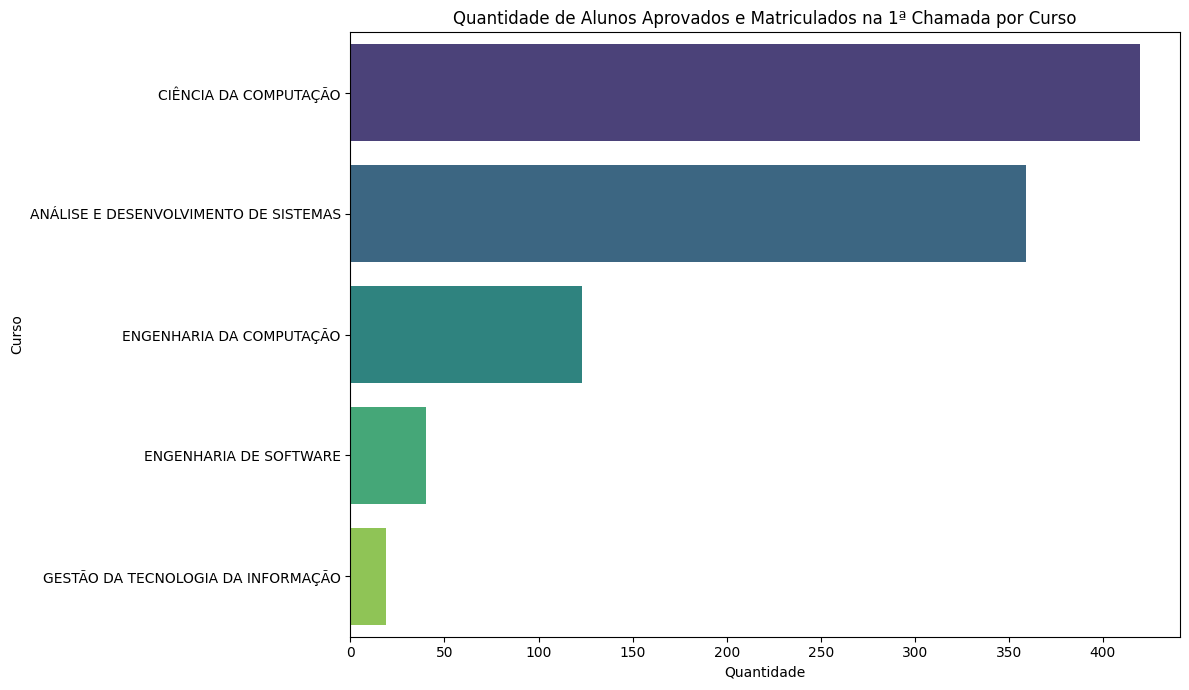

In [12]:
plt.figure(figsize=(12, 7))
sns.barplot(data=contagem, y="nome_curso", x="quantidade", palette="viridis")

plt.title("Quantidade de Alunos Aprovados e Matriculados na 1ª Chamada por Curso")
plt.xlabel("Quantidade")
plt.ylabel("Curso")
plt.tight_layout()
plt.show()